<a href="https://colab.research.google.com/github/hyuntaedo/FastCampus_DataMining_Problem/blob/main/Chapter_01_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D%EC%9C%BC%EB%A1%9C_%EC%8B%AC%EB%B6%80%EC%A0%84%EC%A6%9D%EC%9D%84_%EC%98%88%EB%B0%A9%ED%95%A0_%EC%88%98_%EC%9E%88%EC%9D%84%EA%B9%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 데이터 분석으로 심부전증을 예방할 수 있을까?
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 Heart Failure Prediction 데이터셋을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    heart_failure_clinical_records_dataset.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    age: 환자의 나이
    anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
    creatinine_phosphokinase: 크레아틴키나제 검사 결과
    diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
    ejection_fraction: 박출계수 (%)
    high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
    platelets: 혈소판 수 (kiloplatelets/mL)
    serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
    serum_sodium: 혈중 나트륨 레벨 (mEq/L)
    sex: 성별 (0: 여성, 1: 남성)
    smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
    time: 관찰 기간 (일)
    DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)
    
    
    
- 데이터 출처: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


## 최종 목표
    - 의료 데이터와 그 분석에 대한 이해
    - Colab 및 Pandas 라이브러리 사용법 이해
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - Classification 모델의 학습과 평가 방법 이해

- 출제자 : 신제용 강사
---

## Step 0. 의료 데이터셋에 대하여

### 의료 데이터의 수집


### 의료 데이터 분석의 현재


### Accuracy, Precision, 그리고 Recall

## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- 한글 폰트 다운받기


In [2]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [3]:
# 폰트 설정하기 
import matplotlib.font_manager as fm
import matplotlib
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=path, size=10)
plt.rc('font', family='NanumBarunGothic') 
matplotlib.font_manager._rebuild()

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [4]:
import os

In [5]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'kumahappy'
os.environ['KAGGLE_KEY'] = 'a6676c86b1e77caa856b2938ee49e939'

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [6]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data


heart-failure-clinical-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!unzip -qq '/content/heart-failure-clinical-data.zip'

replace heart_failure_clinical_records_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: rename
new name: rename


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [8]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv',encoding='utf-8')

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 데이터프레임의 각 컬럼 분석하기


In [9]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [10]:
df.rename(columns={
    'age':'나이',
    'anaemia':'빈혈',
    'creatinine_phosphokinase':'크레아틴키나제(검사결과)',
    'diabetes':'당뇨병',
    'ejection_fraction':'박출계수(%)',
    'high_blood_pressure':'고혈압',
    'platelets':'혈소판수',
    'serum_creatinine':'혈중크레아틴레벨',
    'serum_sodium':'혈중소금농도',
    'sex':'성별',
    'smoking':'담배여부',
    'time':'관찰기간',
    'DEATH_EVENT':'사망여부'
},inplace=True)

In [11]:
df.head()

,나이,빈혈,크레아틴키나제(검사결과),당뇨병,박출계수(%),고혈압,혈소판수,혈중크레아틴레벨,혈중소금농도,성별,담배여부,관찰기간,사망여부
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [12]:
df.describe()

,나이,빈혈,크레아틴키나제(검사결과),당뇨병,박출계수(%),고혈압,혈소판수,혈중크레아틴레벨,혈중소금농도,성별,담배여부,관찰기간,사망여부
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [13]:
df.describe().mean()

나이                   85.966088
빈혈                   37.740943
크레아틴키나제(검사결과)      1335.453418
당뇨병                  37.739016
박출계수(%)              69.489807
고혈압                  37.728663
혈소판수             251820.158267
혈중크레아틴레벨             39.341049
혈중소금농도              139.004737
성별                   37.890871
담배여부                 37.723593
관찰기간                148.359385
사망여부                 37.723593
dtype: float64

In [14]:
df.describe()

,나이,빈혈,크레아틴키나제(검사결과),당뇨병,박출계수(%),고혈압,혈소판수,혈중크레아틴레벨,혈중소금농도,성별,담배여부,관찰기간,사망여부
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   나이             299 non-null    float64
 1   빈혈             299 non-null    int64  
 2   크레아틴키나제(검사결과)  299 non-null    int64  
 3   당뇨병            299 non-null    int64  
 4   박출계수(%)        299 non-null    int64  
 5   고혈압            299 non-null    int64  
 6   혈소판수           299 non-null    float64
 7   혈중크레아틴레벨       299 non-null    float64
 8   혈중소금농도         299 non-null    int64  
 9   성별             299 non-null    int64  
 10  담배여부           299 non-null    int64  
 11  관찰기간           299 non-null    int64  
 12  사망여부           299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [16]:
df.isna().sum()

나이               0
빈혈               0
크레아틴키나제(검사결과)    0
당뇨병              0
박출계수(%)          0
고혈압              0
혈소판수             0
혈중크레아틴레벨         0
혈중소금농도           0
성별               0
담배여부             0
관찰기간             0
사망여부             0
dtype: int64

### 문제 5. 수치형 데이터의 히스토그램 그리기


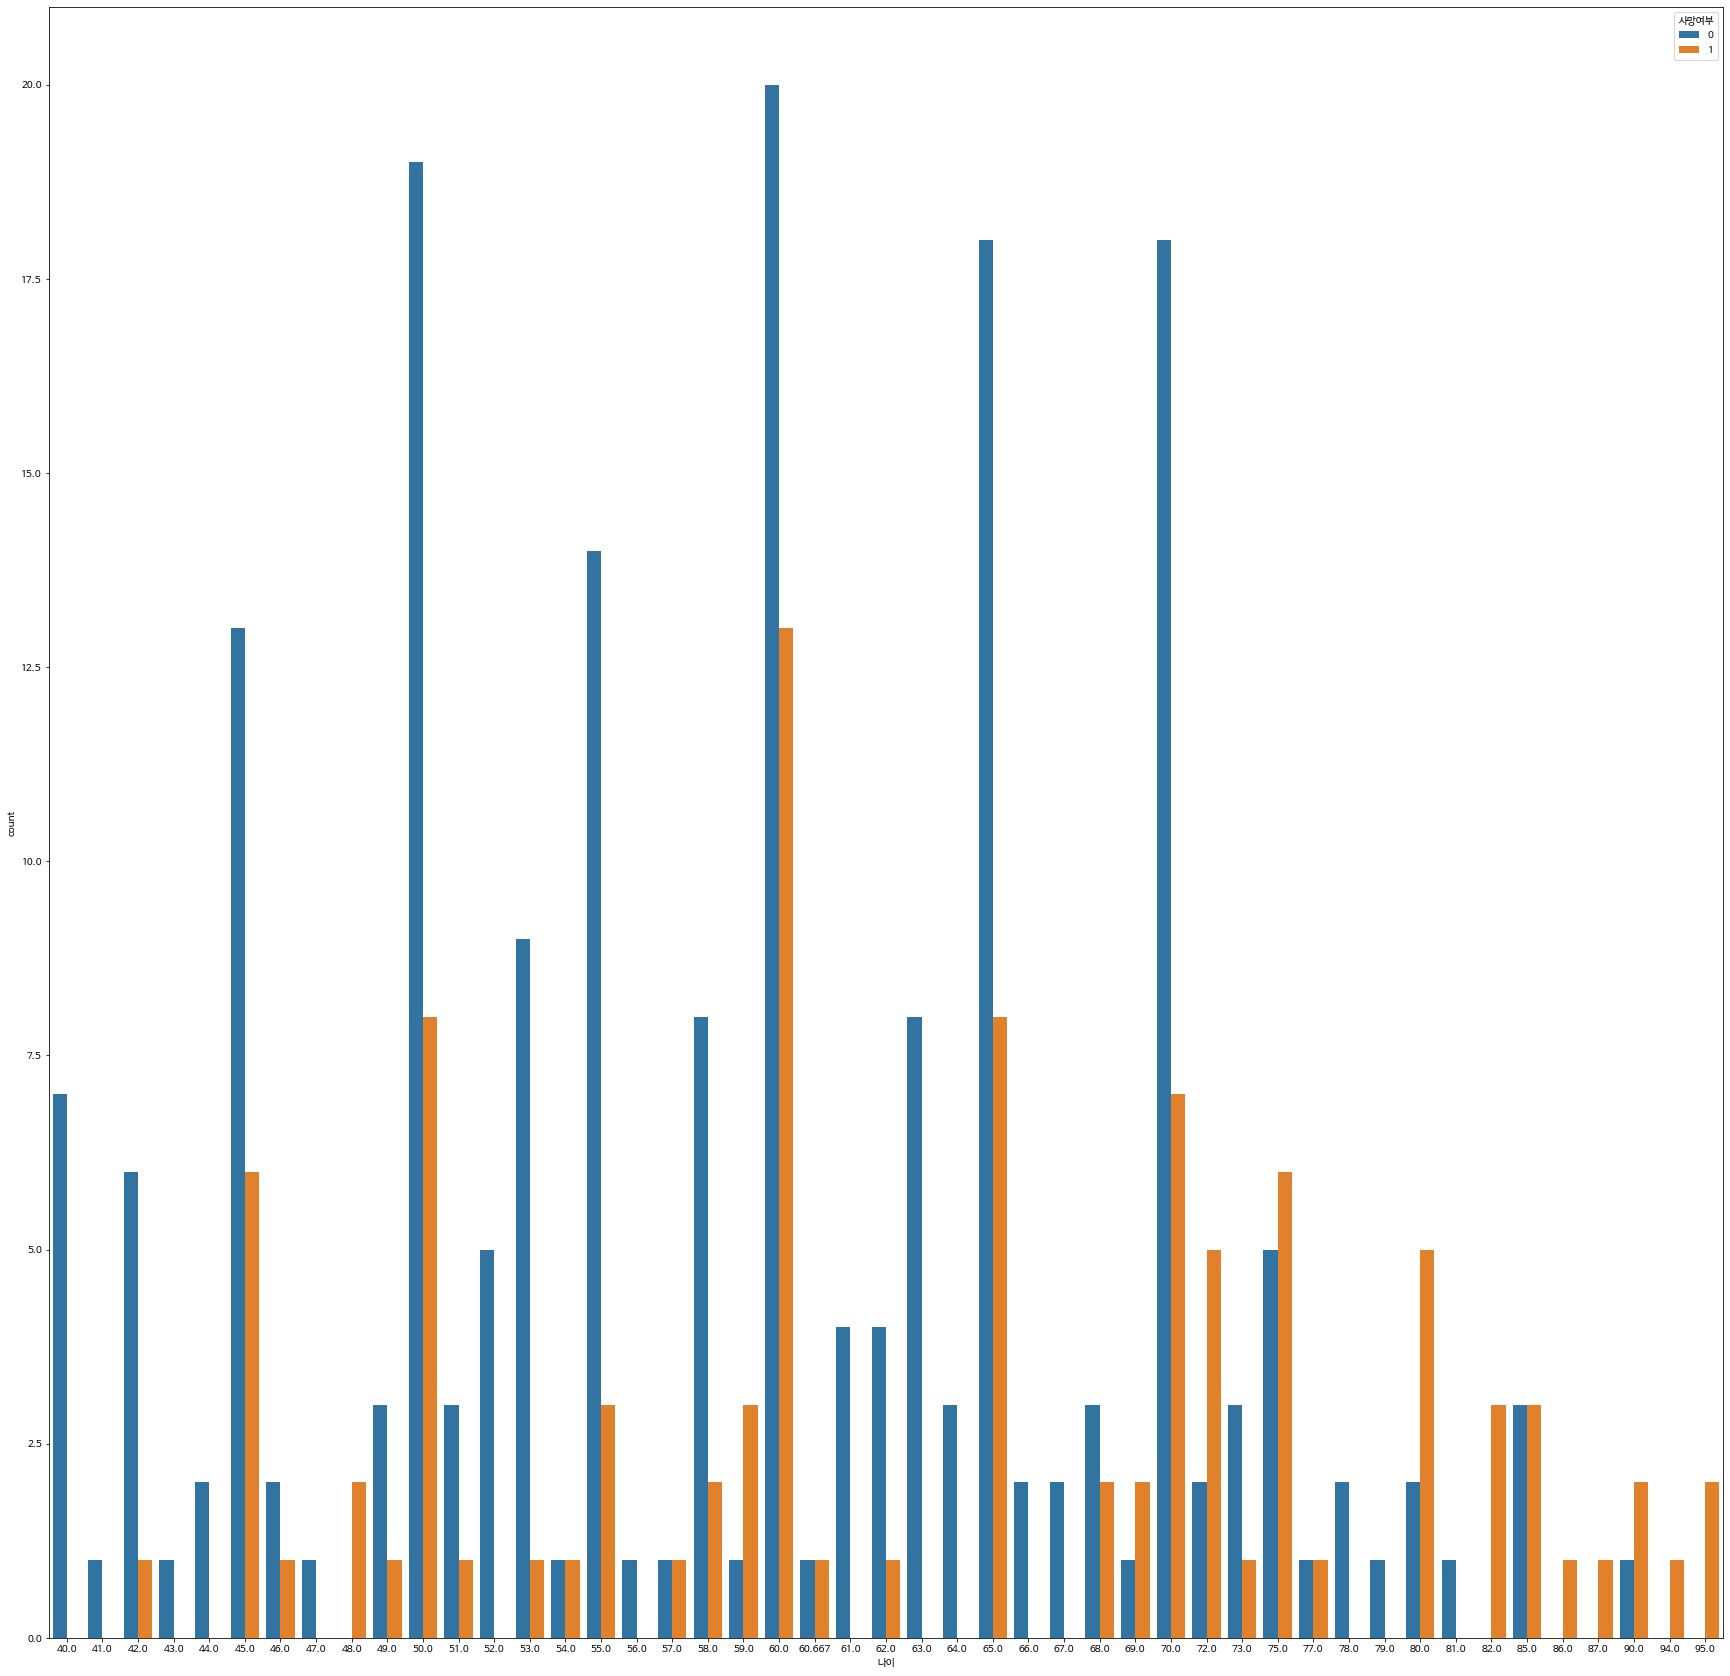

In [17]:
# seaborn의 histplot, jointplot, pairplot을 이용해 히스토그램 그리기
plt.figure(figsize=[30,30])
sns.countplot(data=df,x='나이',hue='사망여부')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 2160x2160 with 0 Axes>

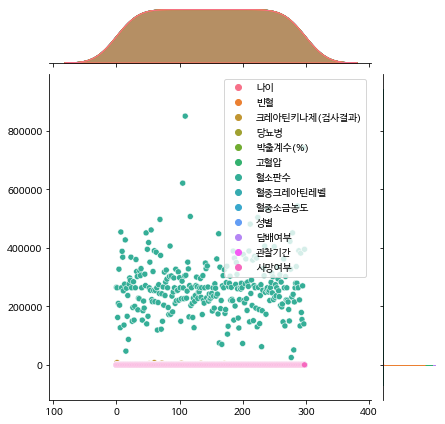

In [18]:
plt.figure(figsize=[30,30])
sns.jointplot(data=df)

<Figure size 2160x2160 with 0 Axes>

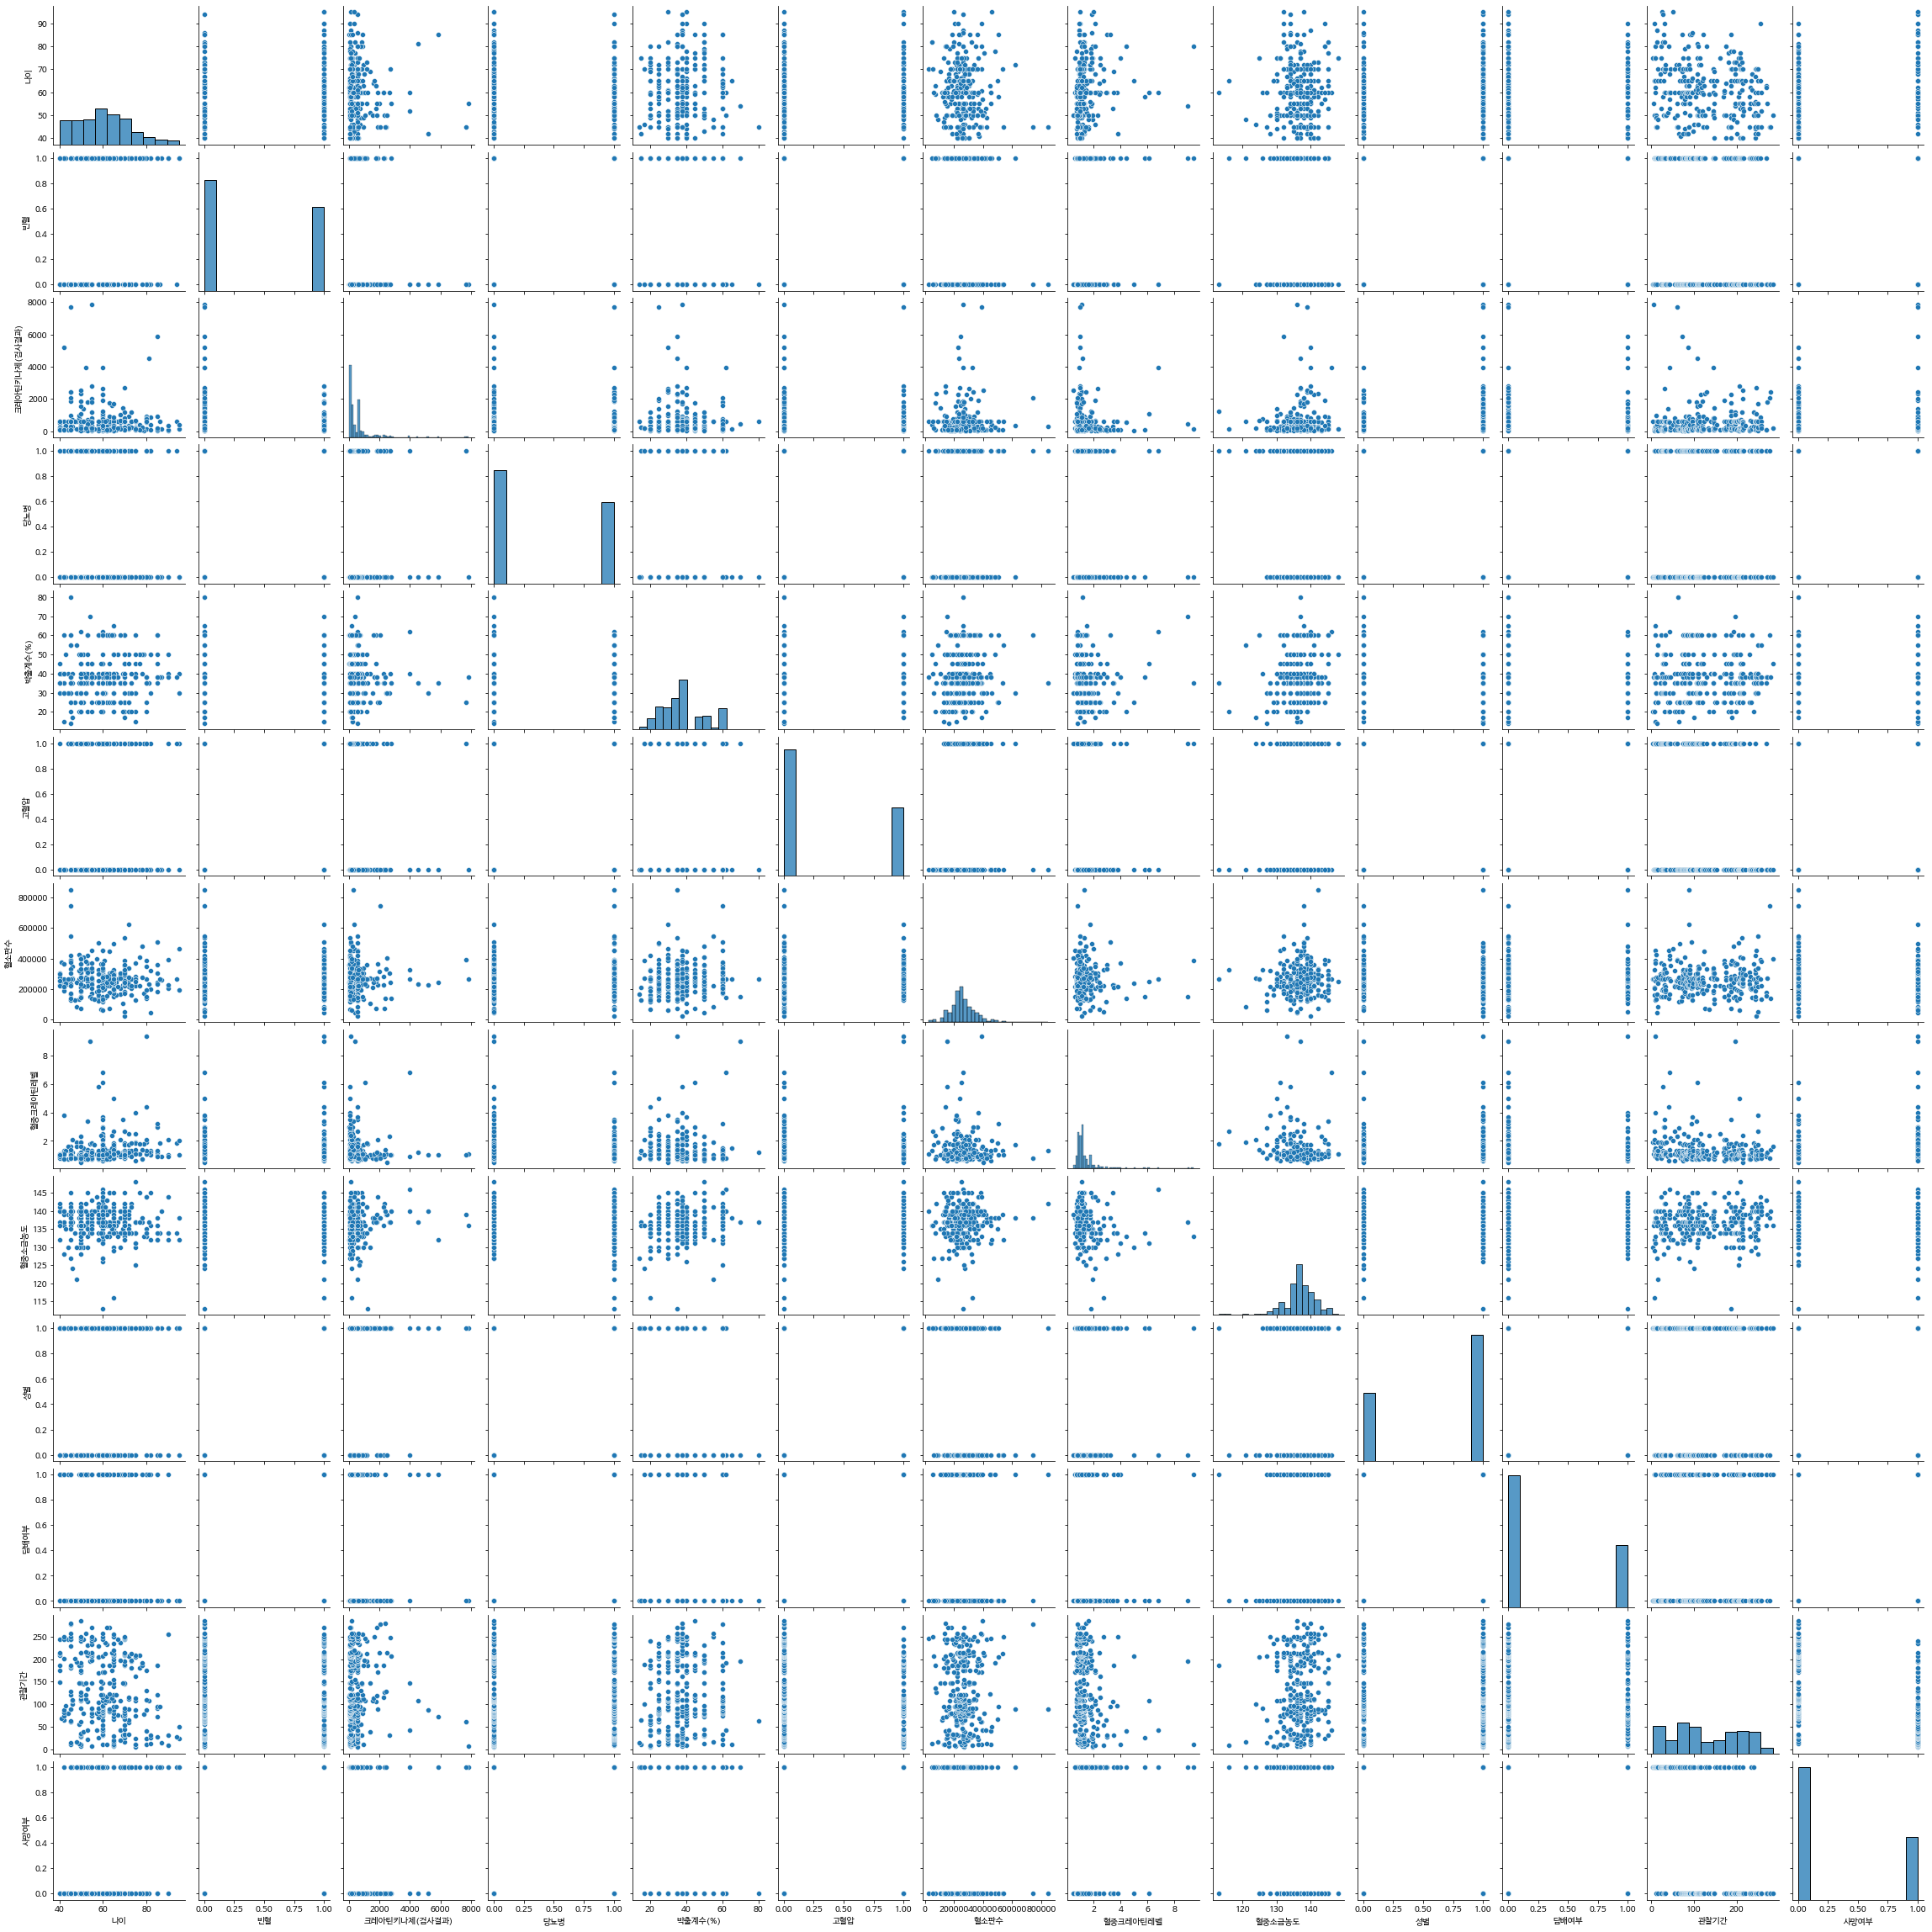

In [19]:
plt.figure(figsize=[30,30])
sns.pairplot(data=df)

### 문제 6. Boxplot 계열을 이용하여 범주별 통계 확인하기


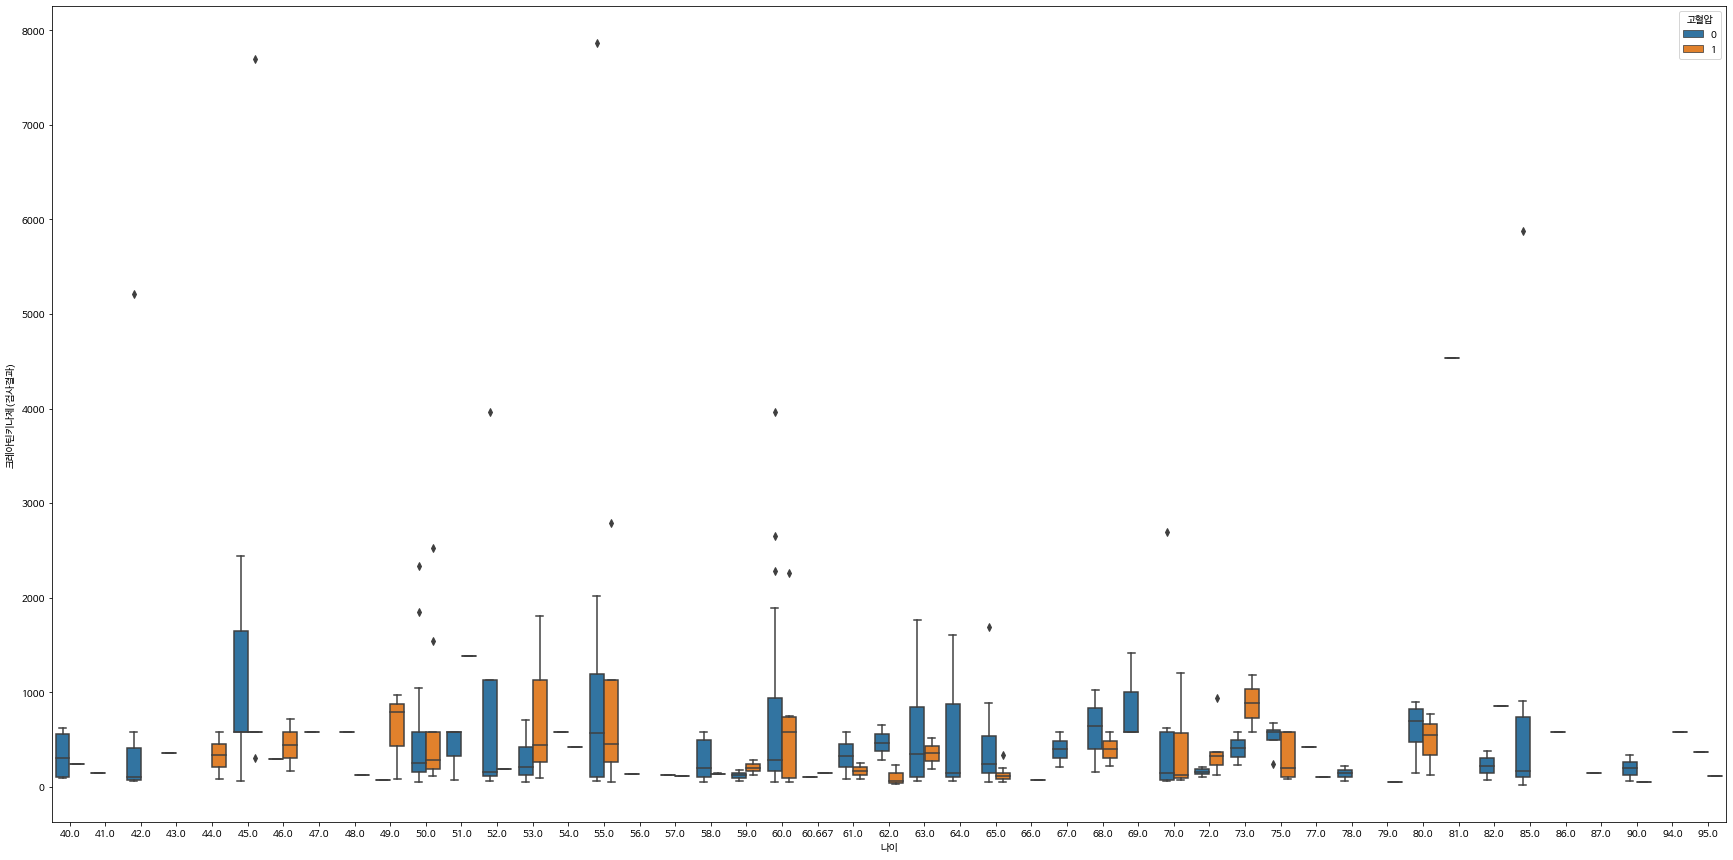

In [20]:
# seaborn의 Boxplot 계열(boxplot(), violinplot(), swarmplot())을 사용
# Hint) hue 키워드를 사용하여 범주 세분화 가능
plt.figure(figsize=[30,15])
sns.boxplot(data=df,x='나이',y='크레아틴키나제(검사결과)',hue='고혈압')

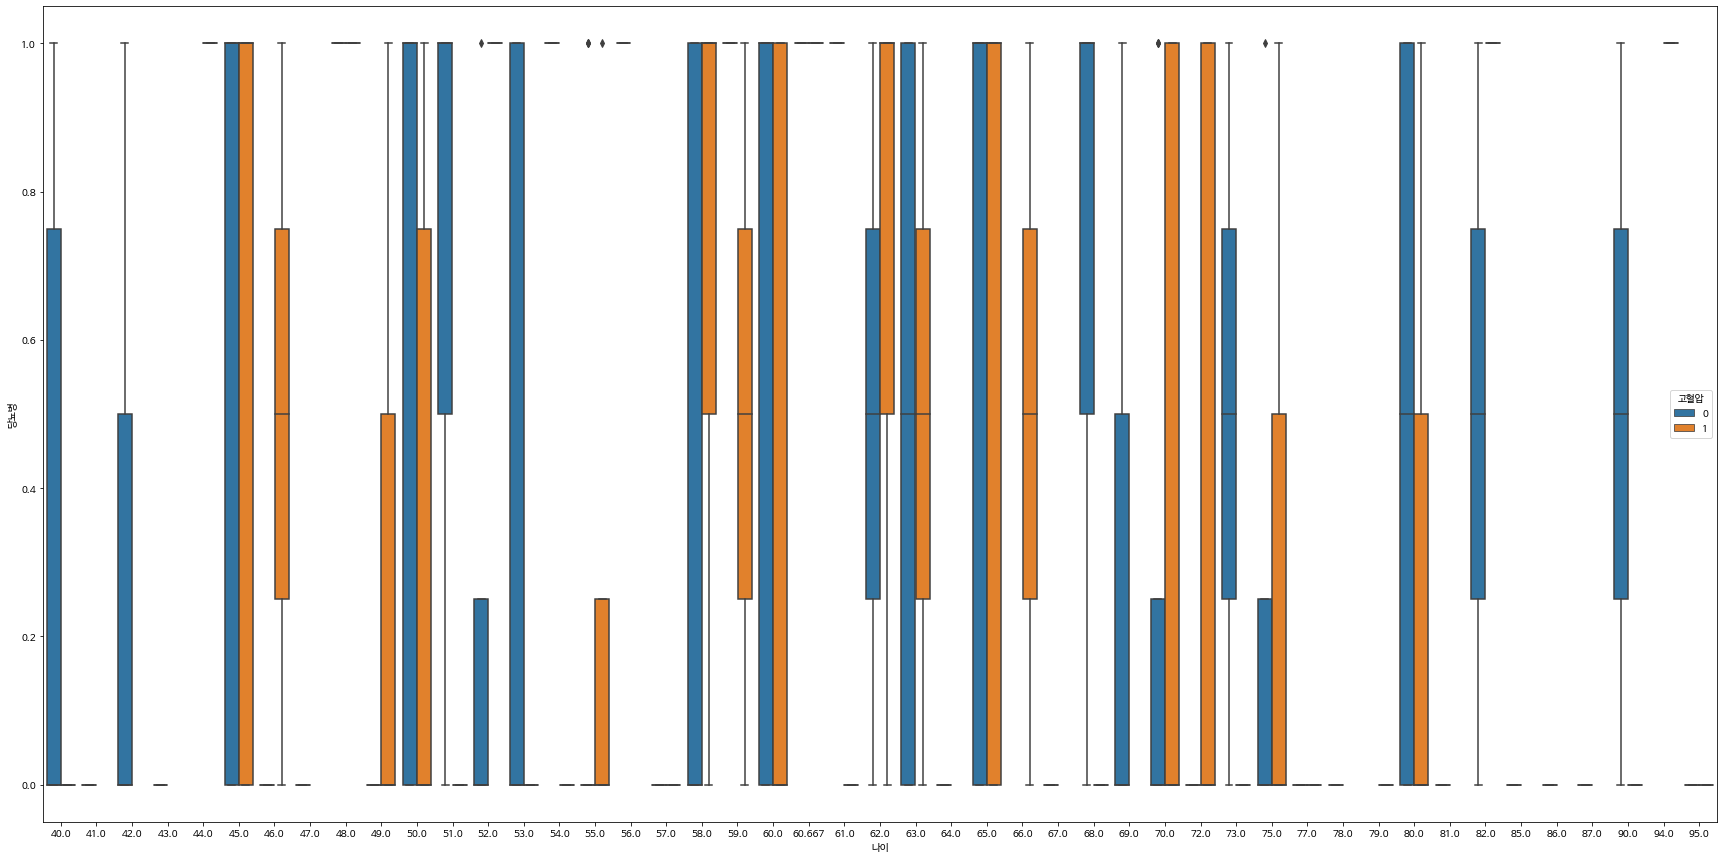

In [21]:
plt.figure(figsize=[30,15])
sns.boxplot(data=df,x='나이',y='당뇨병',hue='고혈압')

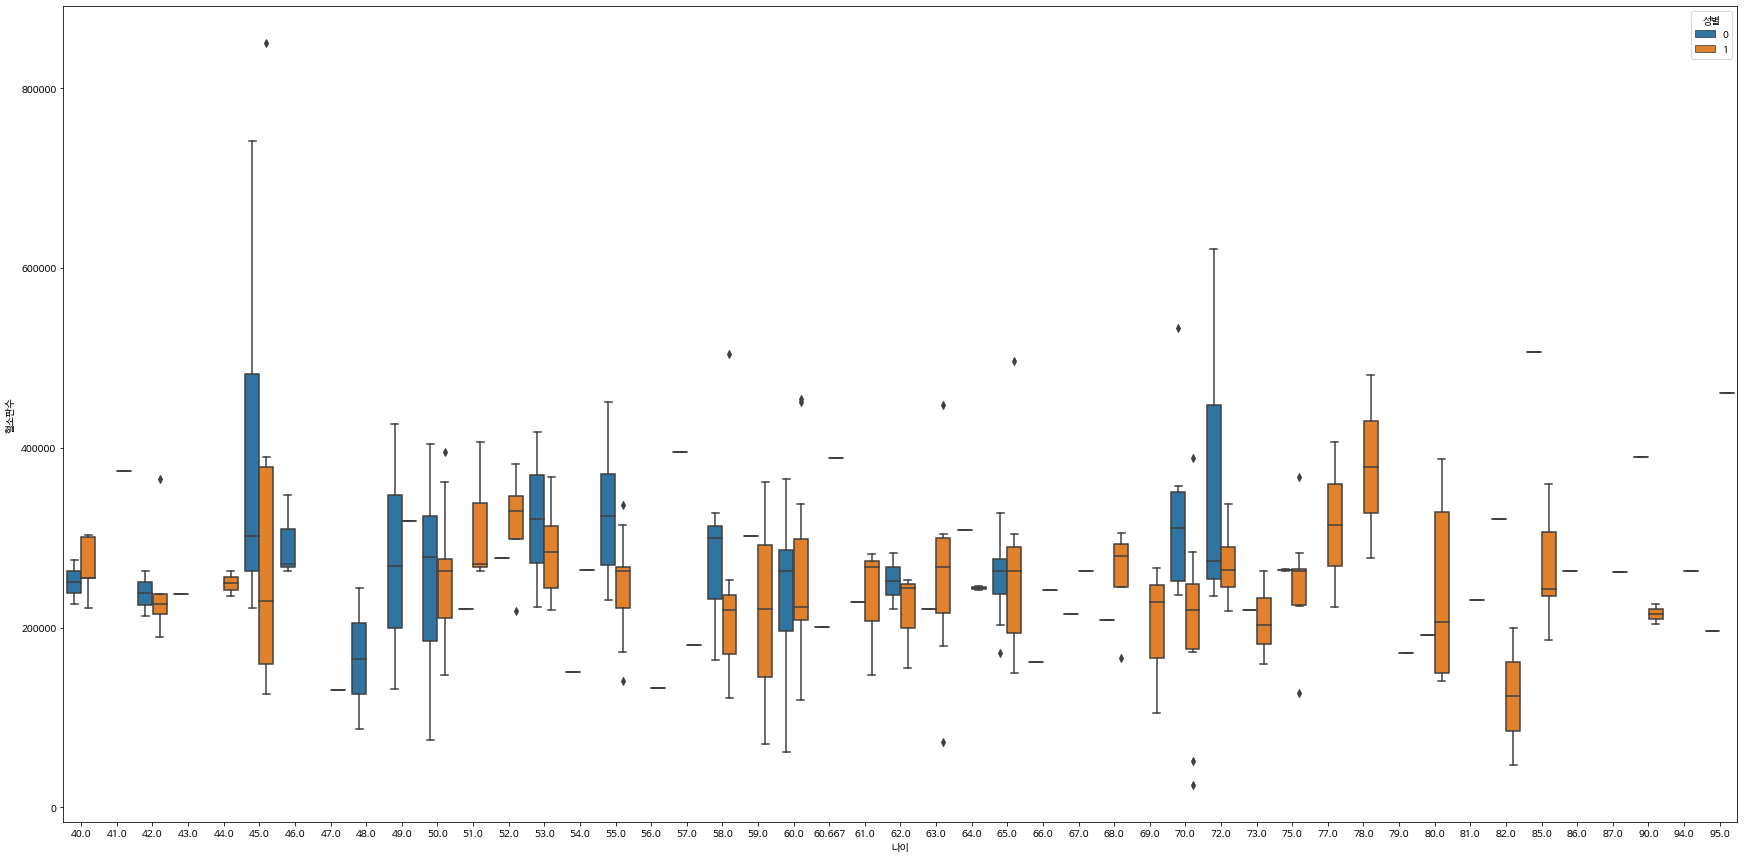

In [22]:
plt.figure(figsize=[30,15])
sns.boxplot(data=df,x='나이',y='혈소판수',hue='성별')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


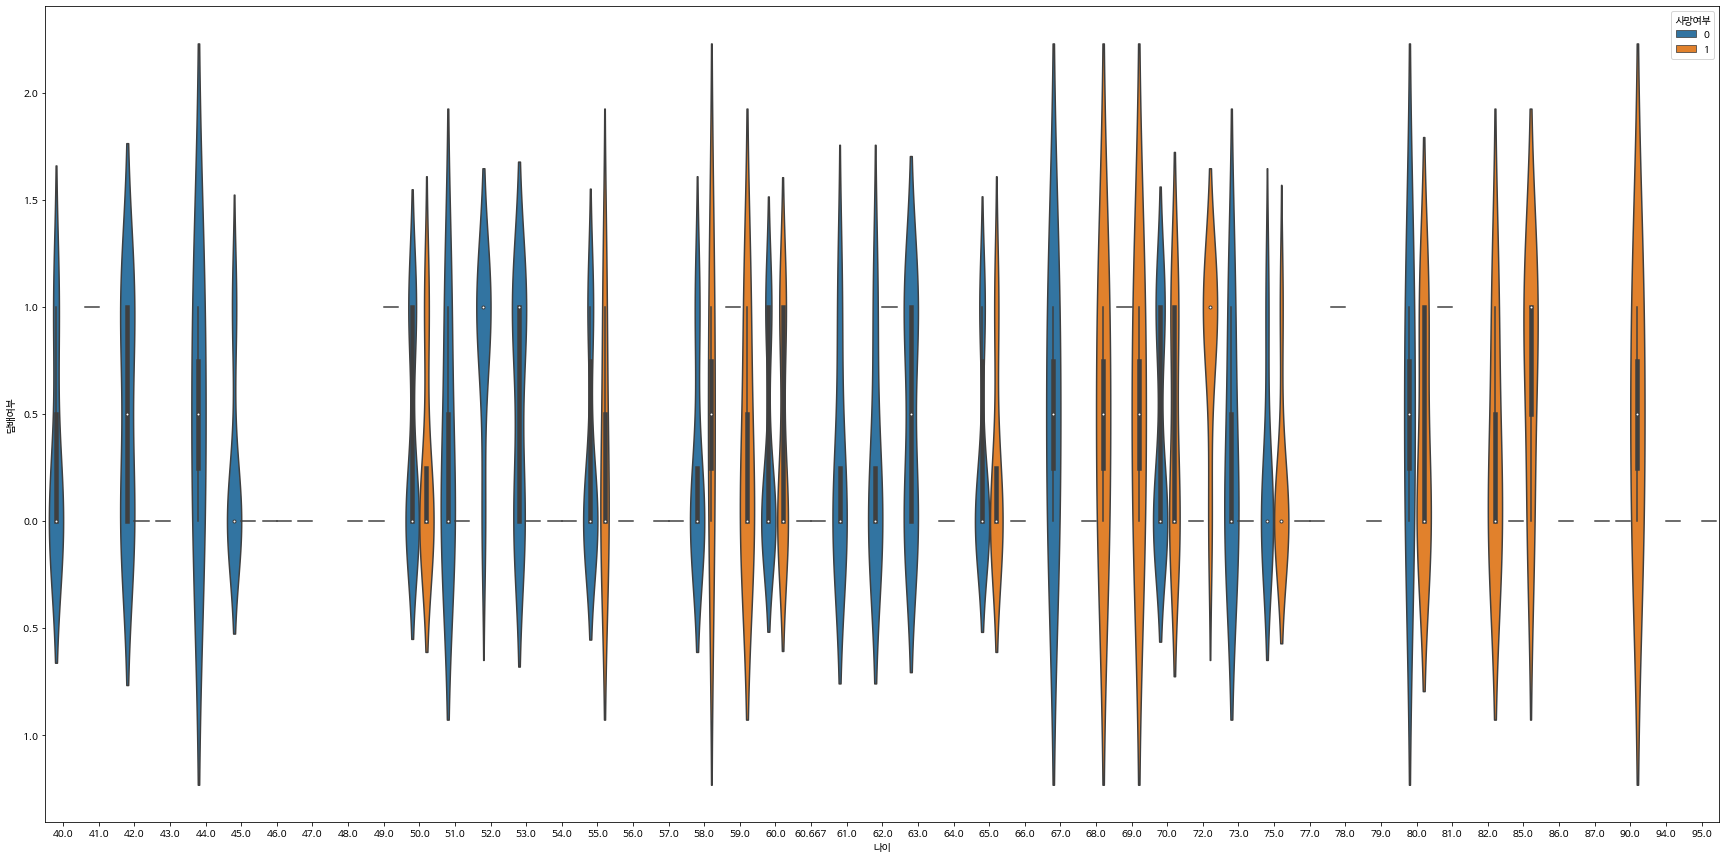

In [23]:
plt.figure(figsize=[30,15])
sns.violinplot(data=df,x='나이',y='담배여부',hue='사망여부')

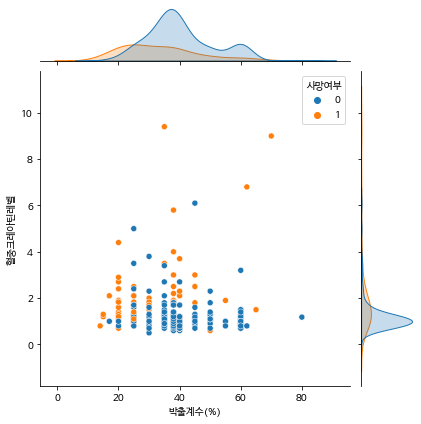

In [51]:
sns.jointplot(x='박출계수(%)',y='혈중크레아틴레벨',data=df,hue='사망여부')

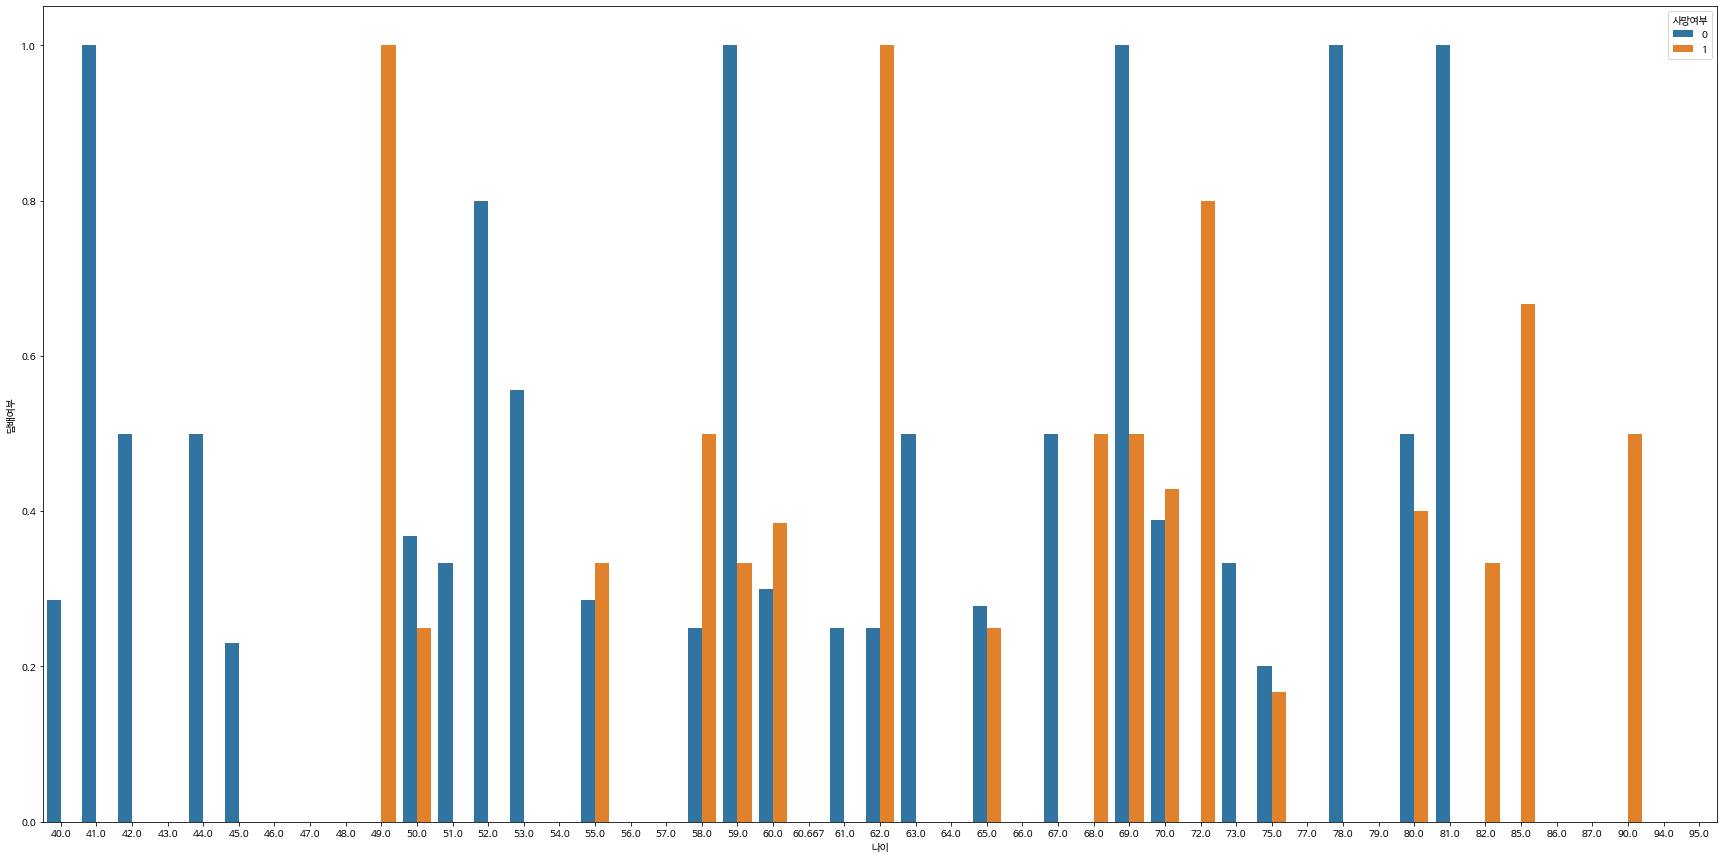

In [24]:
plt.figure(figsize=[30,15])
sns.barplot(data=df,x='나이',y='담배여부',hue='사망여부',ci=None)

## Step 3. 모델 학습을 위한 데이터 전처리


### 문제 7. StandardScaler를 이용하여 데이터 전처리하기


In [25]:
from sklearn.preprocessing import StandardScaler

- 평균을 0 으로
- 분산을 1 로


In [26]:
df.columns

Index(['나이', '빈혈', '크레아틴키나제(검사결과)', '당뇨병', '박출계수(%)', '고혈압', '혈소판수',
       '혈중크레아틴레벨', '혈중소금농도', '성별', '담배여부', '관찰기간', '사망여부'],
      dtype='object')

In [27]:
df.head()

,나이,빈혈,크레아틴키나제(검사결과),당뇨병,박출계수(%),고혈압,혈소판수,혈중크레아틴레벨,혈중소금농도,성별,담배여부,관찰기간,사망여부
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [28]:
# 수치형 입력 데이터, 범주형 입력 데이터, 출력 데이터로 구분하기
X_num = df[[
        '나이','크레아틴키나제(검사결과)','박출계수(%)','혈소판수',
       '혈중크레아틴레벨', '혈중소금농도', '관찰기간',    
]]
X_cat = df[[
         '빈혈','당뇨병','고혈압','성별', '담배여부'   
]] 
y = df[['사망여부']]

In [29]:
X_num.head()

,나이,크레아틴키나제(검사결과),박출계수(%),혈소판수,혈중크레아틴레벨,혈중소금농도,관찰기간
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8


In [30]:
X_cat.head()

,빈혈,당뇨병,고혈압,성별,담배여부
0,0,0,1,1,0
1,0,0,0,1,0
2,0,0,0,1,1
3,1,0,0,1,0
4,1,1,0,0,0


In [31]:
# 수치형 입력 데이터를 전처리하고 입력 데이터 통합하기
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num) # transform을 하면 numpy로 데이터가 변하게 됨(index,column정보가 빠짐)
X_scaled = pd.DataFrame(data=X_scaled,index=X_num.index,columns=X_num.columns)
X = pd.concat([X_scaled,X_cat],axis=1)

In [32]:
X.head()

,나이,크레아틴키나제(검사결과),박출계수(%),혈소판수,혈중크레아틴레벨,혈중소금농도,관찰기간,빈혈,당뇨병,고혈압,성별,담배여부
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879,1,1,0,0,0


### 문제 8. 학습데이터와 테스트데이터 분리하기


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1,shuffle=True)

In [35]:
X_train

,나이,크레아틴키나제(검사결과),박출계수(%),혈소판수,혈중크레아틴레벨,혈중소금농도,관찰기간,빈혈,당뇨병,고혈압,성별,담배여부
14,-0.996547,-0.518074,-0.684180,1.675963,-0.381379,0.312044,-1.526256,1,0,1,0,0
210,0.771889,-0.381804,-1.784473,1.286781,-0.381379,-0.141976,0.745172,0,1,1,1,1
236,1.192945,-0.477812,1.008578,-0.157292,-0.284552,2.582144,1.016195,0,0,1,1,0
44,-0.070223,0.006360,1.854958,-0.710340,-0.284552,1.220084,-1.255233,1,1,0,0,0
163,-0.912335,1.808842,-0.260991,-1.929096,-0.478205,1.220084,-0.054990,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
203,-0.070223,-0.539753,-1.107370,-0.525991,2.039276,-0.141976,0.732266,0,0,1,1,1
255,-0.743913,-0.403483,-0.684180,0.723490,-0.381379,1.220084,1.106535,1,1,1,1,1
72,2.035057,5.471619,-0.260991,-0.208500,-0.381379,-1.050016,-0.751905,0,0,0,1,1
235,1.361368,-0.488136,1.008578,1.460889,-0.284552,0.085034,1.016195,1,0,1,1,0


In [36]:
X_test

,나이,크레아틴키나제(검사결과),박출계수(%),혈소판수,혈중크레아틴레벨,혈중소금농도,관찰기간,빈혈,당뇨병,고혈압,성별,담배여부
173,-0.912335,-0.481942,-1.530560,-0.761549,-0.575031,0.539054,0.203127,1,0,0,1,0
287,-1.333392,0.000166,1.431768,2.863994,-0.381379,-1.050016,1.545334,0,1,0,0,0
51,-0.659702,-0.506718,-1.530560,1.583788,0.005926,0.539054,-1.126175,1,0,1,0,0
146,-0.743913,-0.464392,-0.684180,-0.464541,-0.671857,-0.141976,-0.235672,0,0,0,1,1
214,0.350833,-0.461295,-0.260991,0.272858,-0.575031,-0.595996,0.822607,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
122,-0.070223,-0.501556,-0.007077,-0.362124,-0.623444,0.766064,-0.455071,0,1,0,0,0
246,-0.491279,1.481588,-1.107370,0.518657,-0.284552,0.312044,1.080724,0,0,0,1,0
278,-0.912335,0.484338,-0.684180,-0.321158,-0.671857,-0.141976,1.493711,1,1,0,0,0
251,-0.491279,-0.010158,-0.260991,-0.331400,-0.575031,1.447094,1.093630,0,1,0,0,0


## Step 4. Classification 모델 학습하기


### 문제 9. Logistic Regression 모델 생성/학습하기


In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train,y_train)




/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 문제 10. 모델 학습 결과 평가하기


In [39]:
from sklearn.metrics import classification_report

In [40]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_test)
print(classification_report(y_test,pred))




              precision    recall  f1-score   support

           0       0.86      0.92      0.89        64
           1       0.76      0.62      0.68        26

    accuracy                           0.83        90
   macro avg       0.81      0.77      0.78        90
weighted avg       0.83      0.83      0.83        90



### 문제 11. XGBoost 모델 생성/학습하기


In [41]:
from xgboost import XGBClassifier

In [43]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)




/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### 문제 12. 모델 학습 결과 평가하기


In [46]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)
print(classification_report(y_test,pred))




              precision    recall  f1-score   support

           0       0.90      0.97      0.93        64
           1       0.90      0.73      0.81        26

    accuracy                           0.90        90
   macro avg       0.90      0.85      0.87        90
weighted avg       0.90      0.90      0.90        90



### 문제 13. 특징의 중요도 확인하기


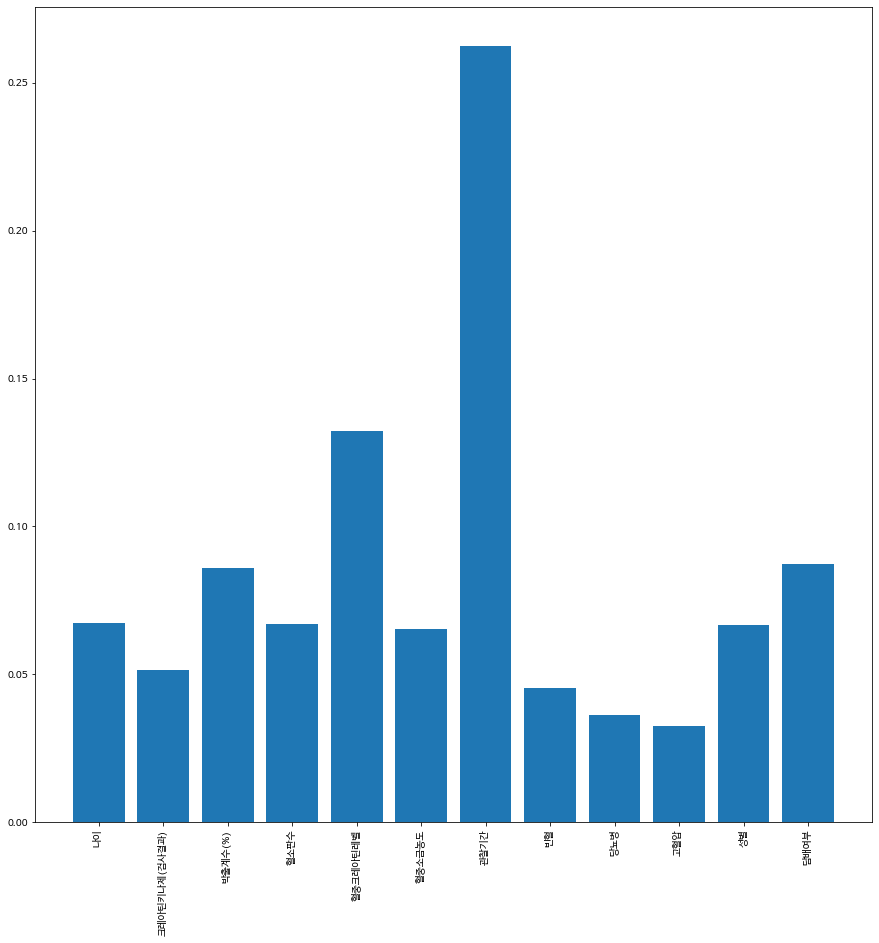

In [50]:
# XGBClassifier 모델의 feature_importances_를 이용하여 중요도 plot
plt.figure(figsize=[15,15])
plt.bar(X.columns,model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()




## Step5 모델 학습 결과 심화 분석하기


### 문제 14. Precision-Recall 커브 확인하기

In [52]:
from sklearn.metrics import plot_precision_recall_curve

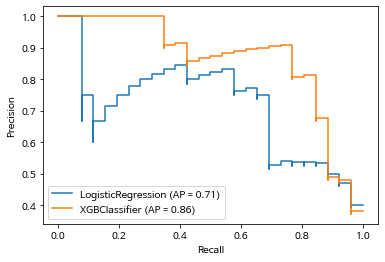

In [56]:
# 두 모델의 Precision-Recall 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)
fig = plt.figure()
ax = fig.gca()
plot_precision_recall_curve(model_lr,X_test,y_test,ax=ax)
plot_precision_recall_curve(model_xgb,X_test,y_test,ax=ax)




### 문제 15. ROC 커브 확인하기

In [57]:
from sklearn.metrics import plot_roc_curve

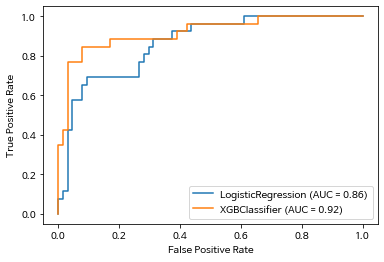

In [59]:
# 두 모델의 ROC 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)
fig = plt.figure()
ax = fig.gca()
plot_roc_curve(model_lr,X_test,y_test,ax=ax)
plot_roc_curve(model_xgb,X_test,y_test,ax=ax)


